<a href="https://colab.research.google.com/github/suzunotree/suzunotree.github.io/blob/main/groupproject_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First we imported the libraries we needed for analysis.
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#This is the API which we worked on. We got it from MBTA.
test_url = 'https://api-v3.mbta.com/route_patterns?filter[route]=CR-Providence&include=representative_trip&fields[trip]=headsign'
response = requests.get(test_url)
data = response.json()

# Extract relevant information into a DataFrame
route_patterns = [
    {
        'route_pattern_id': pattern['id'],
        'direction_id': pattern['attributes']['direction_id'],
        'name': pattern['attributes']['name'],
        'typicality': pattern['attributes']['typicality'],
    }
    for pattern in data['data']
]

df = pd.DataFrame(route_patterns)

# Display the DataFrame to verify the structure
df.head()

,route_pattern_id,direction_id,name,typicality
0,CR-Providence-9cf54fb3-0,0,South Station - Wickford Junction via Back Bay,1
1,CR-Providence-9515a09b-0,0,South Station - Stoughton via Back Bay,1
2,CR-Providence-743ff41d-0,0,South Station - Providence via Back Bay,2
3,CR-Providence-cf299c9f-0,0,South Station - Stoughton via Back Bay,3
4,CR-Providence-e7e93ca2-0,0,South Station - Wickford Junction via Back Bay,3


#Research Question 1: Does the CR-Providence route have more inbound or outbound routes?
#Hypothesis 1: There are more inbound routes.


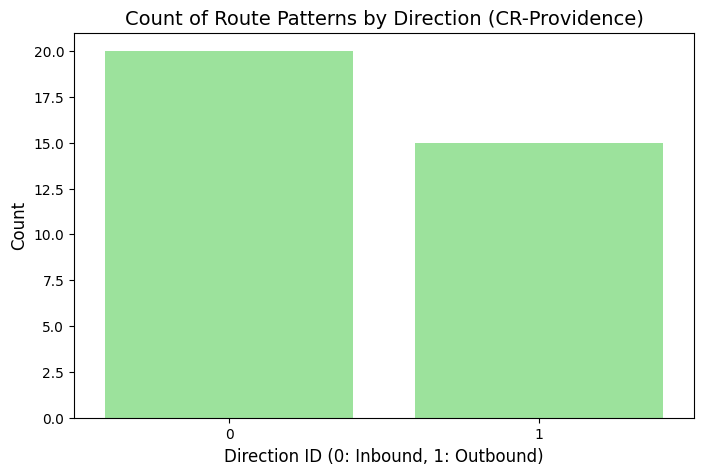

In [ ]:
# Visualize the count of route patterns by direction
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='direction_id', color='lightgreen')
plt.title('Count of Route Patterns by Direction (CR-Providence)', fontsize=14)
plt.xlabel('Direction ID (0: Inbound, 1: Outbound)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

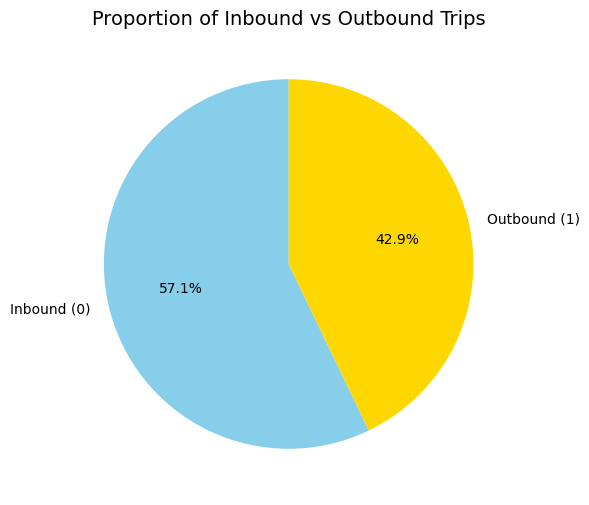

In [ ]:
# Pie chart for proportion of direction usage
direction_counts = df['direction_id'].value_counts()
labels = ['Inbound (0)', 'Outbound (1)']
plt.figure(figsize=(6, 6))
plt.pie(direction_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#87CEEB', '#FFD700'])
plt.title('Proportion of Inbound vs Outbound Trips', fontsize=14)
plt.show()

Result:
The graph for count of route patterns by direction shows that the inbound is higher than outbound.
Also, the piechart confirms that 57% of the routes are inbound, while 43% are outbound, supporting our hypothesis.

#Research question 2: Are certain route patterns more frequent in the data?

#Hypothesis 2: Specific patterns such as "South Station - Wickford Junction" appear more frequently.

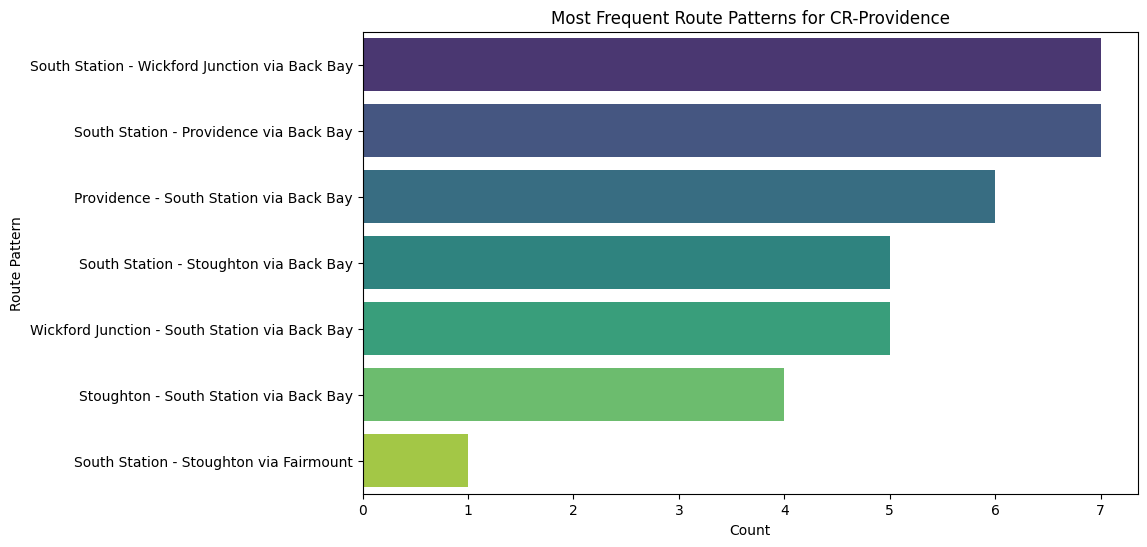

In [ ]:
# Preparing data for the bar chart
frequent_patterns = df['name'].value_counts().reset_index()
frequent_patterns.columns = ['Route Pattern', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=frequent_patterns, x='Count', y='Route Pattern', hue='Route Pattern', dodge=False, palette="viridis", legend=False)
plt.title('Most Frequent Route Patterns for CR-Providence')
plt.xlabel('Count')
plt.ylabel('Route Pattern')
plt.show()

**Result:**

The bar plot of route patterns shows that "South Station - Wickford Junction via Back Bay" and similar patterns dominate the dataset. This confirms that certain route patterns are indeed more frequent than others.

#Research question 3? (Still checking the visualizations if they are accurate and suitable)
Research question: What is the distribution of route patterns based on typicality?

Hypothesis: The majority of route patterns have a typicality score of 1.

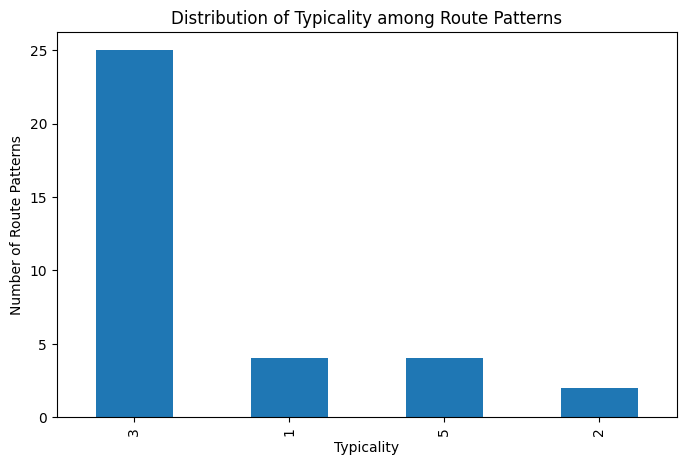

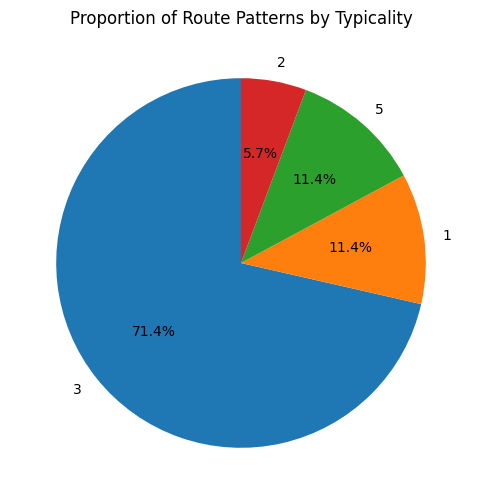

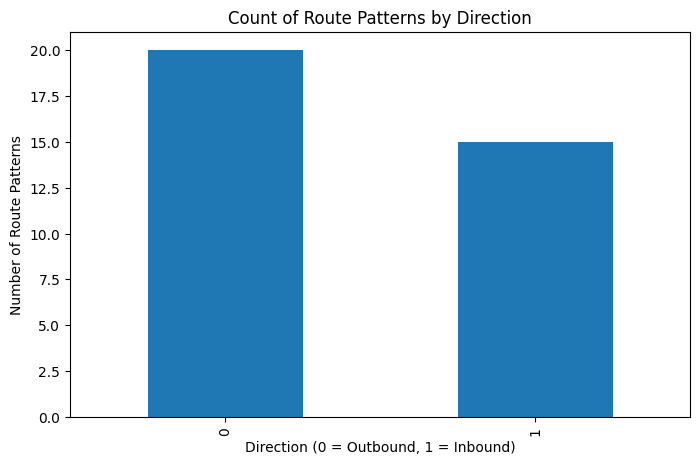

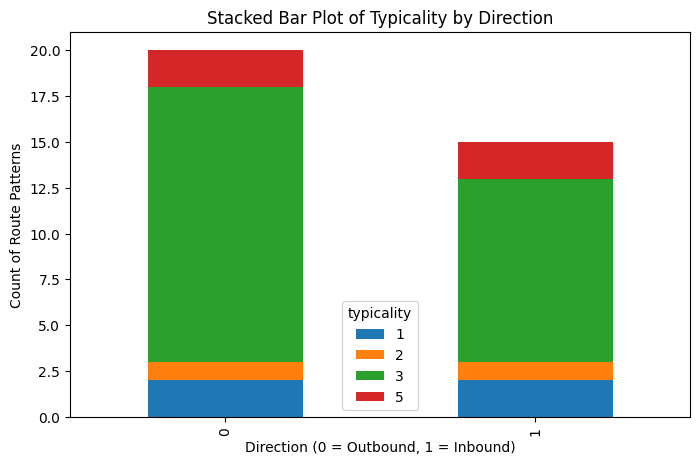

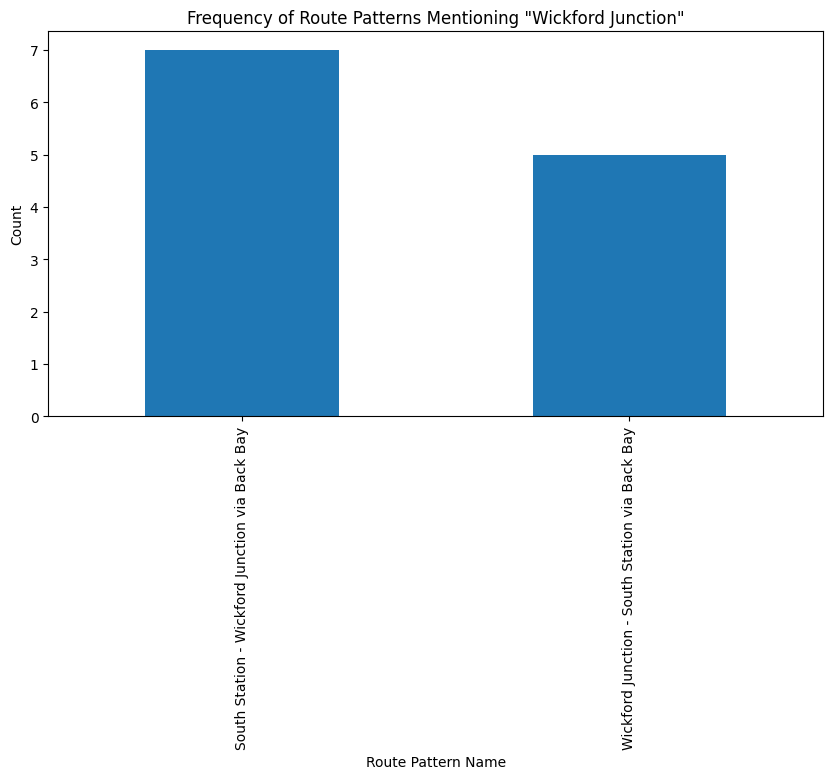

In [ ]:
# Visualization 1: Distribution of Typicality among Route Patterns
plt.figure(figsize=(8, 5))
df['typicality'].value_counts().plot(kind='bar')
plt.title('Distribution of Typicality among Route Patterns')
plt.xlabel('Typicality')
plt.ylabel('Number of Route Patterns')
plt.show()

# Visualization 2: Proportion of Typicality Types (Pie Chart)
plt.figure(figsize=(6, 6))
df['typicality'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Route Patterns by Typicality')
plt.ylabel('')  # Hides the ylabel for better visualization
plt.show()

# Visualization 3: Route Patterns Count by Direction (Bar Plot)
plt.figure(figsize=(8, 5))
df['direction_id'].value_counts().plot(kind='bar')
plt.title('Count of Route Patterns by Direction')
plt.xlabel('Direction (0 = Outbound, 1 = Inbound)')
plt.ylabel('Number of Route Patterns')
plt.show()

# Visualization 4: Stacked Bar Plot - Typicality by Direction
typicality_direction = df.groupby(['direction_id', 'typicality']).size().unstack()
typicality_direction.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Stacked Bar Plot of Typicality by Direction')
plt.xlabel('Direction (0 = Outbound, 1 = Inbound)')
plt.ylabel('Count of Route Patterns')
plt.show()

# Visualization 5: Frequency of Destinations in Route Names (Filtered for Wickford Junction)
plt.figure(figsize=(10, 5))
df[df['name'].str.contains('Wickford Junction')]['name'].value_counts().plot(kind='bar')
plt.title('Frequency of Route Patterns Mentioning "Wickford Junction"')
plt.xlabel('Route Pattern Name')
plt.ylabel('Count')
plt.show()

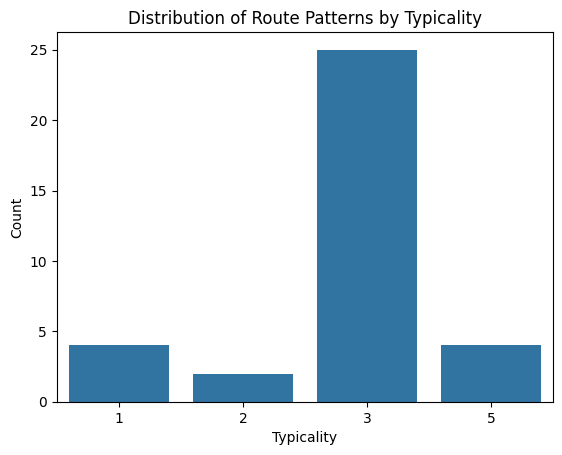

(count    35.000000
 mean      2.942857
 std       0.998318
 min       1.000000
 25%       3.000000
 50%       3.000000
 75%       3.000000
 max       5.000000
 Name: typicality, dtype: float64,
 direction_id
 0    0.571429
 1    0.428571
 Name: proportion, dtype: float64)

In [ ]:
# Step 1: Developing Research Questions and Hypotheses

# Research Question 1: What is the distribution of route patterns based on typicality?
# Hypothesis 1: The majority of route patterns for the CR-Providence route have a typicality score of 1.

# Research Question 2: Does the CR-Providence route have more inbound or outbound routes?
# Hypothesis 2: There are more inbound (direction_id=0) routes than outbound (direction_id=1) for the CR-Providence line.

# Research Question 3: Are certain route patterns more frequent in the data?
# Hypothesis 3: Specific patterns such as "South Station - Wickford Junction" appear more frequently than others.

# Step 2: Visualizing and Exploring the Data

# 1. Distribution of route patterns by typicality
sns.countplot(data=df, x='typicality')
plt.title('Distribution of Route Patterns by Typicality')
plt.xlabel('Typicality')
plt.ylabel('Count')
plt.show()


# Basic Statistics for Exploration
# 1. Summary of typicality distribution
typicality_summary = df['typicality'].describe()

# 2. Proportion of inbound vs outbound routes
direction_proportion = df['direction_id'].value_counts(normalize=True)

typicality_summary, direction_proportion